##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Rohan Chavan, Mihir Kulkarni

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

## Loading Input Dataset
We load the given dataset using Pandas as a DataFrame Object

In [60]:
import pandas as pd
import numpy as np

dataset = pd.read_excel("diabetes2.xlsx")

## Dataset Generation
We pick 500 random data points to be used in our project, using fastML synthesizer of sdv module. This dataset is saved to the local storage as dataset.csv

In [61]:
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset

# Setting up the metadata for the dataset, to be used in the synthesizer
metadata = SingleTableMetadata()
# AutoDetecting features of the dataframe
metadata.detect_from_dataframe(dataset)
# Setting the type (for sdv) of Outcome to categorical
metadata.update_column(
    column_name='Outcome',
    sdtype='categorical')

# Creating the synthesizer
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

# Shuffling the data and generating 500 sample datapoints from it
dataset = dataset.sample(frac = 1)
synthesizer.fit(
    data=dataset
)
sample_data = synthesizer.sample(
    num_rows=500
)
# Saving generated dataset in a local csv file
sample_data.to_csv('dataset.csv')
sample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,121,81,26,171,35.102827,0.470401,47,0
1,2,147,29,19,132,24.379551,0.454500,28,1
2,1,134,50,13,85,50.133075,0.493993,31,0
3,0,87,80,17,0,33.721560,0.580005,41,0
4,1,111,98,11,124,29.401533,0.345619,21,0
...,...,...,...,...,...,...,...,...,...
495,1,126,89,52,167,39.880953,0.423968,21,0
496,4,126,75,27,36,32.863526,0.635777,50,0
497,0,189,65,11,201,39.107646,0.615248,35,1
498,3,149,87,44,176,37.359194,0.831835,46,1


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

## Loading Generated Dataset
We load the dataset we saved to the local storage previously

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore',category=FutureWarning)
dataset = pd.read_csv('dataset.csv', index_col=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,121,81,26,171,35.102827,0.470401,47,0
1,2,147,29,19,132,24.379551,0.454500,28,1
2,1,134,50,13,85,50.133075,0.493993,31,0
3,0,87,80,17,0,33.721560,0.580005,41,0
4,1,111,98,11,124,29.401533,0.345619,21,0
...,...,...,...,...,...,...,...,...,...
495,1,126,89,52,167,39.880953,0.423968,21,0
496,4,126,75,27,36,32.863526,0.635777,50,0
497,0,189,65,11,201,39.107646,0.615248,35,1
498,3,149,87,44,176,37.359194,0.831835,46,1


## Initial Exploratory Analysis
We perform Exploratory Analysis on the dataset to check for illeagal values
using _info_ function of pandas and seaborn histogram plots

### Info Function

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


**Inference:** We see 768 data points with 8 features and an ouput field "Outcome". The dataset does not contain any explicit Null or NaN values.

### Histogram Plot

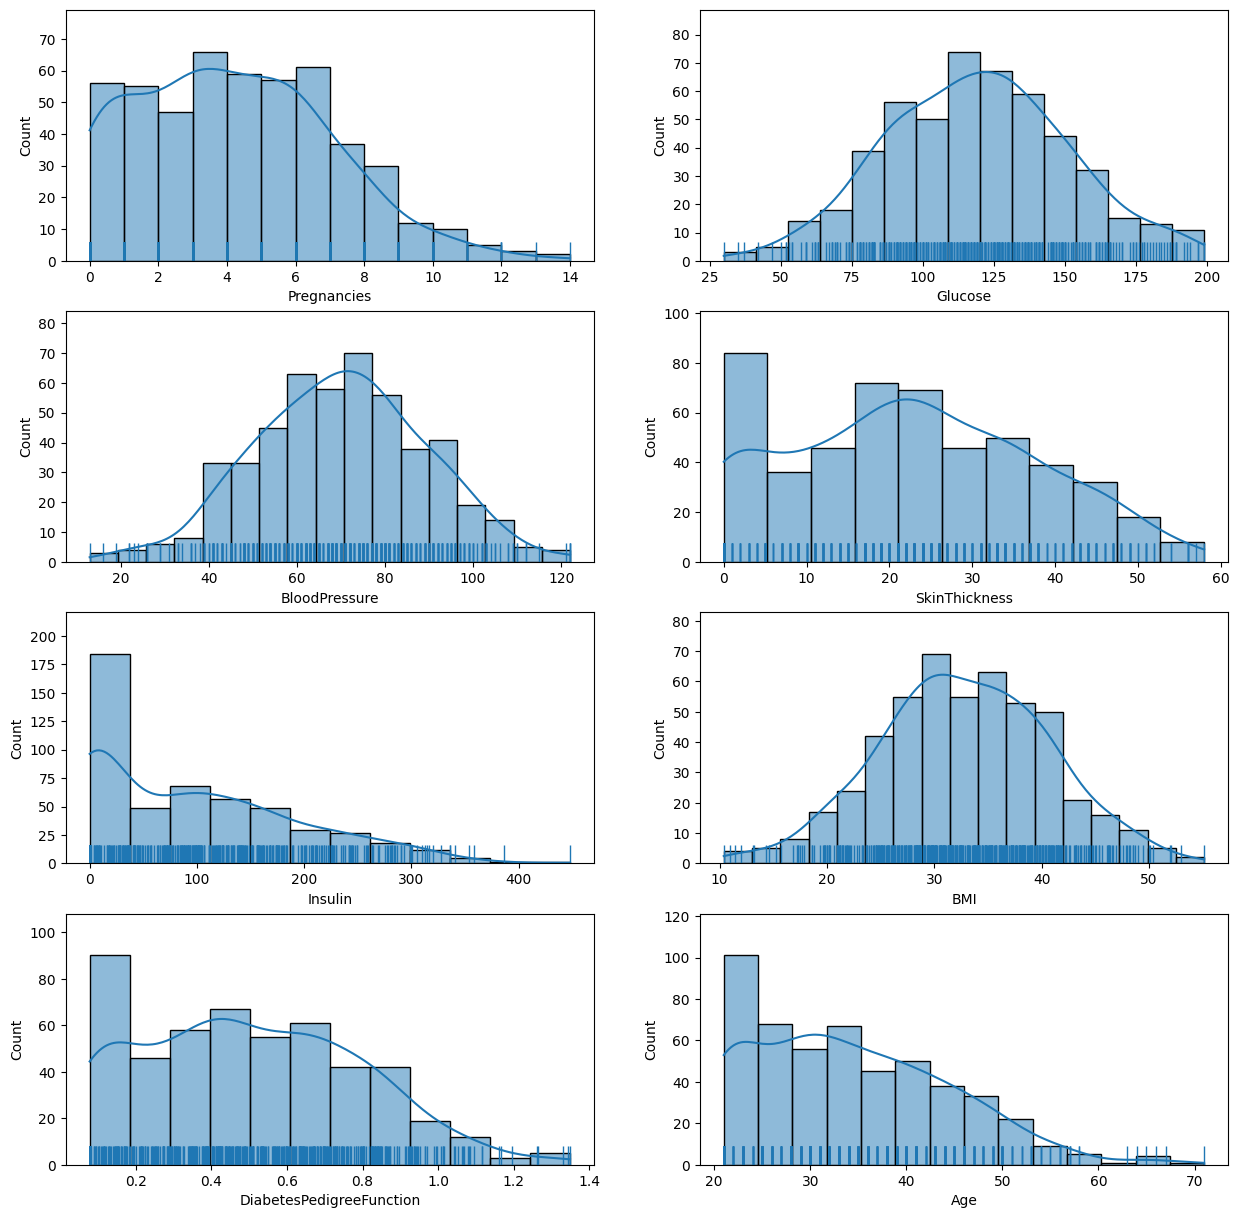

In [64]:
def draw_histplot(height = 0.075):
  # plotting the 8 input features together on the
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.histplot(dataset[col], ax = axs[i], kde = True)
    sns.rugplot(dataset[col], ax = axs[i], height=height)
    i+=1
  plt.show()

draw_histplot()

**Inference:** We see that the fields _Glucose, BloodPressure, SkinThickness, Insulin, BMI_ contain zeroes which is invalid; thus before proceding further we need to either drop the rows containing invalid values, or fill them with some other value.

Since there are large number of rows with 0 in fields _SkinThickness, Insulin_ and _BloodPressure_, instead of droppeing them, we will fill all of them with their respective means.

__Note__: It is possible for the fasting Insulin levels of a Type 1 diabetic person to fall to 0; since this is a rare circumstance, we will treat this value as incorrect.

## Filling Null Values

We fill in the missing values in the dataset with mean of the remaining data

In [65]:
# replacing 0s with NaN for easier calculations
# filling these NaN values with mean
for col in ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'):
  dataset[col].replace(0, np.NaN, inplace=True)
  mean = dataset[col].mean(skipna=True)
  dataset[col].fillna(value=mean, inplace=True)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,121,81,26.0,171.000000,35.102827,0.470401,47,0
1,2,147,29,19.0,132.000000,24.379551,0.454500,28,1
2,1,134,50,13.0,85.000000,50.133075,0.493993,31,0
3,0,87,80,17.0,135.182561,33.721560,0.580005,41,0
4,1,111,98,11.0,124.000000,29.401533,0.345619,21,0
...,...,...,...,...,...,...,...,...,...
495,1,126,89,52.0,167.000000,39.880953,0.423968,21,0
496,4,126,75,27.0,36.000000,32.863526,0.635777,50,0
497,0,189,65,11.0,201.000000,39.107646,0.615248,35,1
498,3,149,87,44.0,176.000000,37.359194,0.831835,46,1


## Outlier Detection (Box Plots)

We check for outliers in the dataset using boxplots on each field

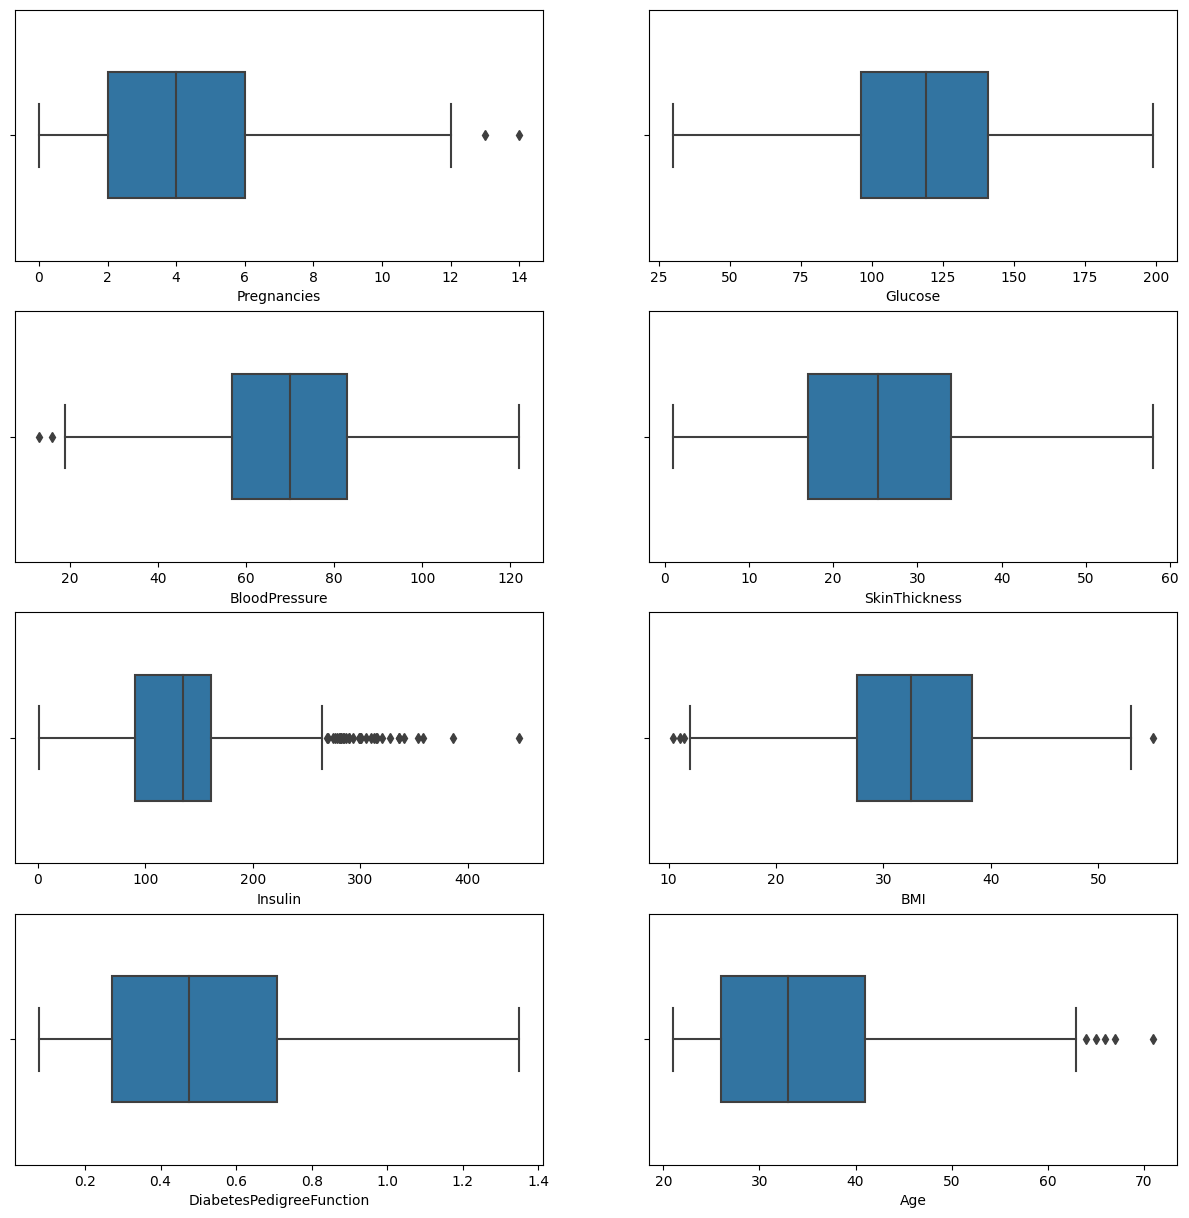

In [66]:
def draw_boxplot(width=0.5):
  # plotting the 8 input features together on the same figure
  fig, axs = plt.subplots(4, 2, figsize=(15,15))
  # convert axes represented in 4x2 into 8x1 (2D array to 1D array)
  axs = axs.flatten()
  i = 0
  for col in dataset.columns[:8]:
    sns.boxplot(x=dataset[col], ax=axs[i], width=width)
    i+=1
  plt.show()

draw_boxplot()

**Inference:** We see that there are very few outlying points. The outliers in the fields _ and _Pregnancies_ are most likely to represent real data. While the higher outliers in _BMI_ and _BloodPressure_ are most likely present due to errors, thus we remove them.


## Deleting outliers

We delete the outlying points (points lying outside 1.925 times the inter-quartile difference of the first and third quartile (first quartile being the 25th percentile and third being the 75th)).

In [90]:
for col in ('BMI', 'BloodPressure', 'Insulin', 'SkinThickness'):
  median = dataset[col].median()
  difference = np.percentile(dataset[col], 75) - np.percentile(dataset[col], 25)
  upper_bound = median + difference*1.925
  dataset = dataset[(dataset[col] <= upper_bound)]

386.82521474259806

## Saving Preprocessed Dataset

We save the preprocessed dataset into preprcessed.csv file. We also redraw all the graphs after preprocessing.

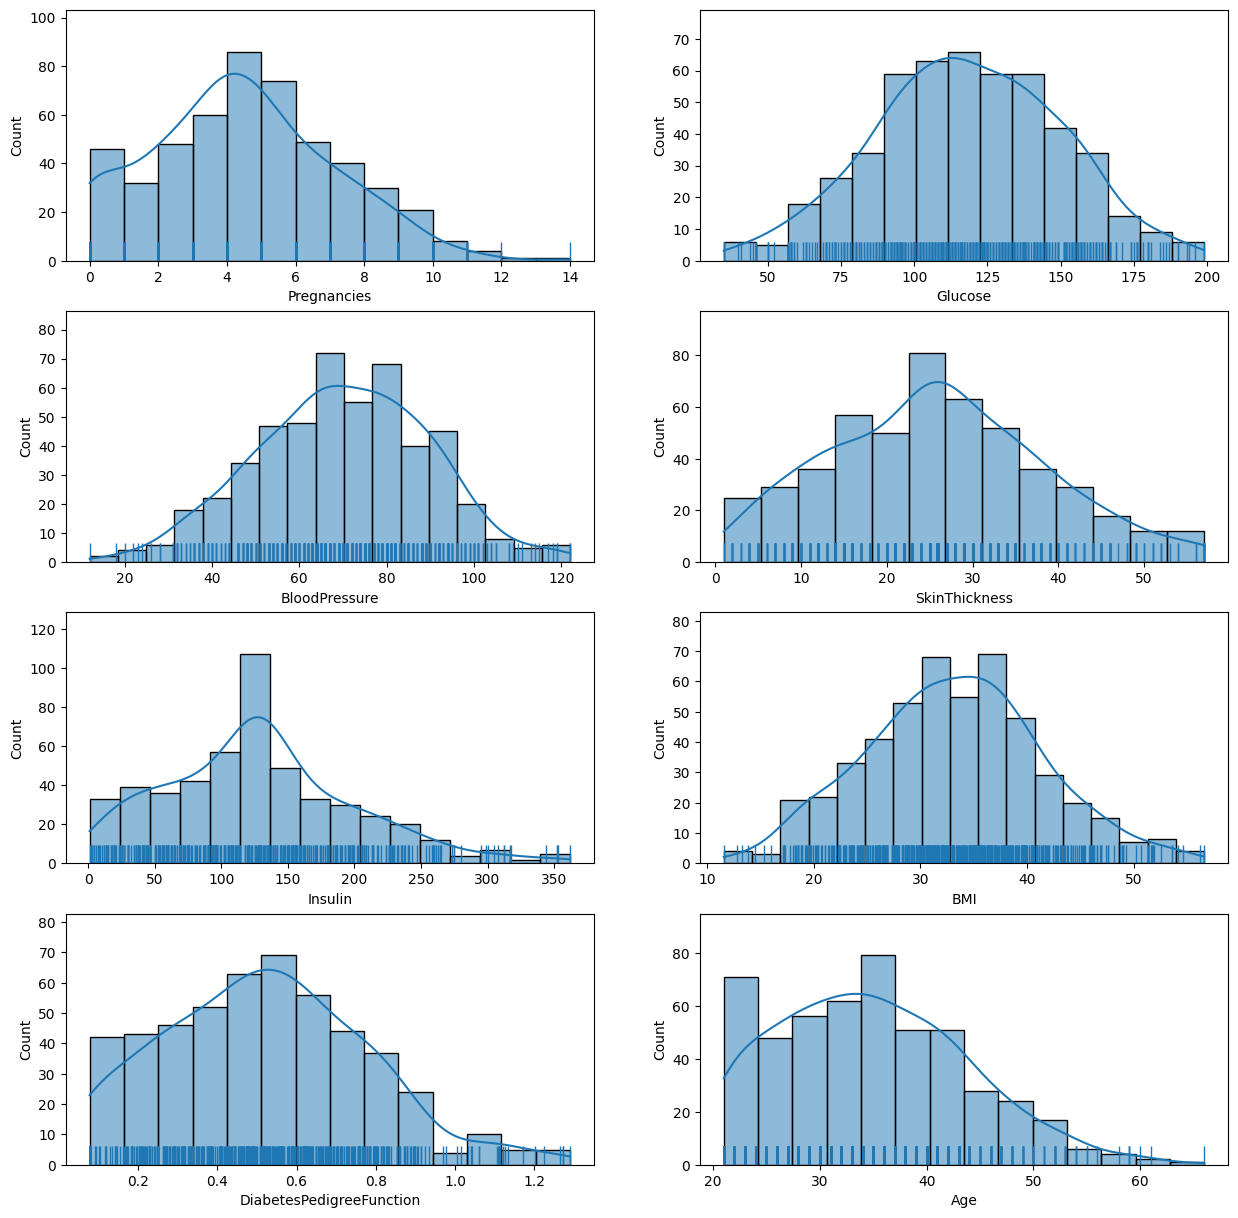

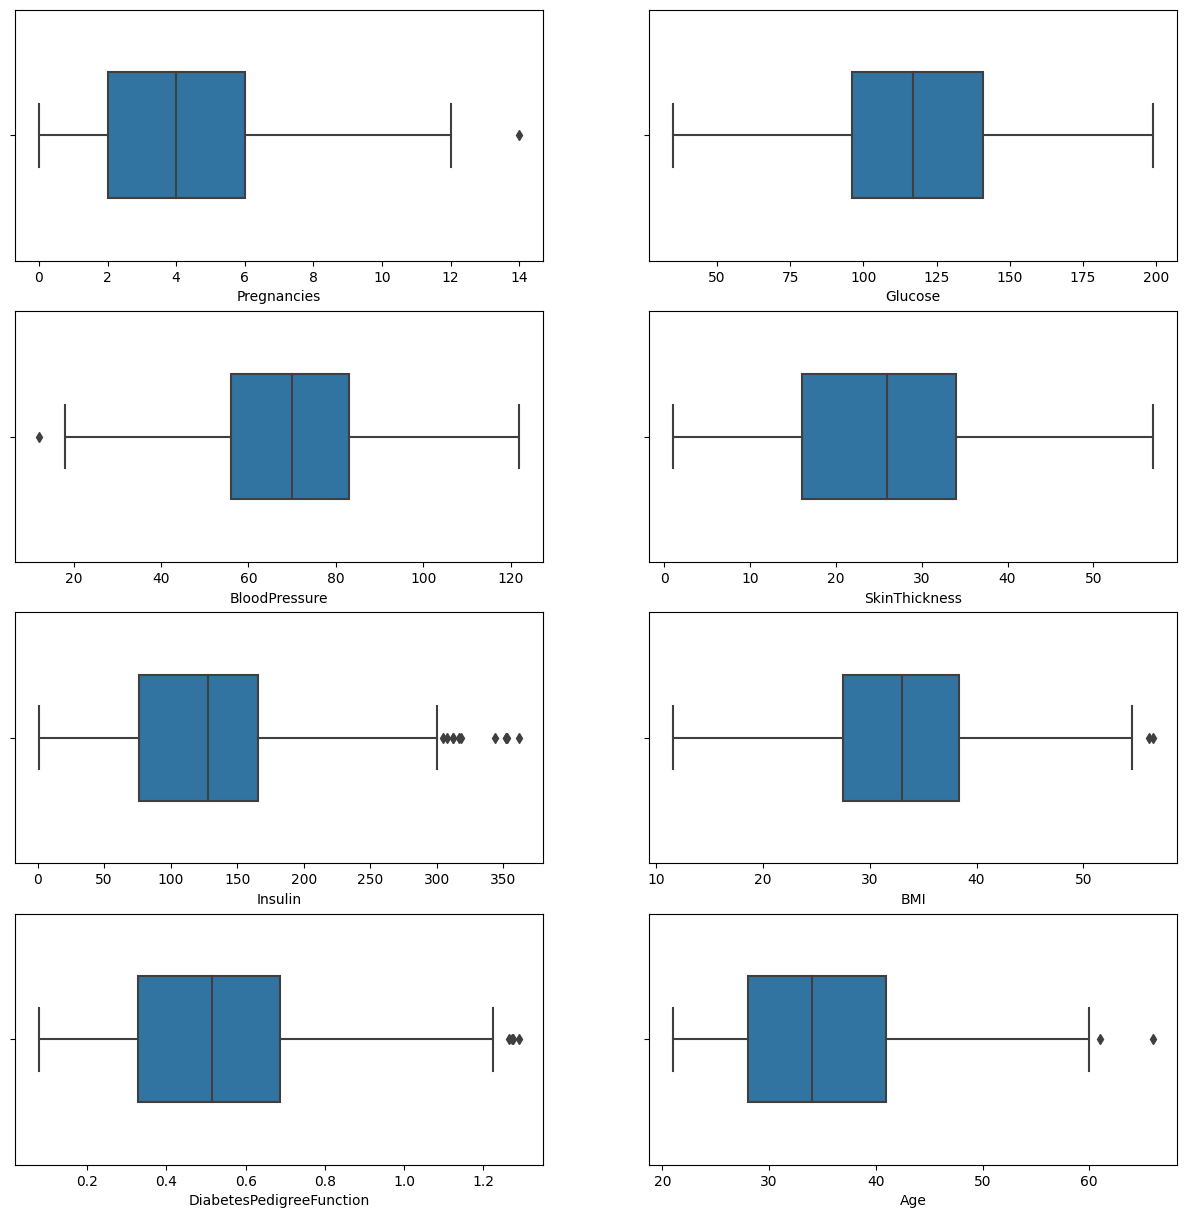

In [29]:
dataset.to_csv("preprocessed.csv")
draw_histplot()
draw_boxplot()

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

### Loading the preprocessed dataset

In [ ]:
import pandas as pd
dataset = pd.read_csv('preprocessed.csv')

## Performing SGD Algorithm

In [ ]:
# TODO

## **_Batch Gradient Descent_**

## **_Insights drawn (plots, markdown explanations)_**

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

## **_Ridge Regression_**

## **_Insights drawn (plots, markdown explanations)_**

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

## **_Least Squares Classification_**

## **_Insights drawn (plots, markdown explanations)_**

# **_5. References_**

1.   List item
2.   List item

